Oskari Läntinen<br>
student number 508244 <br>
osanlan@utu.fi  <br>
November, 23, 2020  <br>

# Data Analysis and Knowledge Discovery: Exercise 2, Data Understanding and Visualization

This is the template for the second exercise. You can add more code and markup cells, as long as the flow of the notebook stays fluent and logical.

The aim of this exercise is to practice data understanding; check the content and validity of the data, correct and select data, and apply basic descriptive statistics and visualization for further understanding.

Two datasets are used: shipdata1_2020.csv and shipdata2_2020.csv. The same data will be used in the next exercise, with same attributes, but in a more cleaned format.<br> 

General guidance for exercises is given in the course Moodle page. <br>

- Answer to **all** questions below, even if you can't get your script to fully work
- Write clear and easily readable code, include explanations what your code does
- Make informative illustrations: include labels for x and y axes, legends and captions for your plots
- Before saving the ipynb file (and possible printing) run: "Restart & Run all", to make sure you return a file that works as expected.
- Grading: *Fail*/*Pass*/*Pass with honors* (+1)
- +1 bonus point (grading *Pass with honors*) requires a completely correct solution and also thorough analysis. 
- If you encounter problems, Google first. If you can't find an answer to the problem, don't hesitate to ask in the Moodle discussion or directly: elmasyr@utu.fi (mattermost.utu.fi, moodle chat or email).
- Note! Don't leave it to the last moment! Not feedback service dusring the weekend.
- The deadline is **Mon November 16th 23:59**

Gather *all* packages needed for this notebook here:

In [1]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

# Show the plots inline in the notebook
%matplotlib inline

## 1. Know your data, a quick dive into domain knowledge

The data used in this exercise is a subset from the Marine Traffic portal. More information available for example here:
- https://www.marinetraffic.com/blog/information-transmitted-via-ais-signal/
- https://www.diva-portal.org/smash/get/diva2:833998/FULLTEXT01.pdf
- https://www.marinetraffic.com/en/data/


Exercise data columns/attributes:
- MMSI
    * ?
- Speed
    * The speed (in knots x10) that the subject vessel is reporting according to AIS transmissions
- COG
    * Course Over Ground<br> COG=3600 means “not available”
- Destination
    * The Destination of the subject vessel according to the AIS transmissions
- Ship_type
    * The Shiptype of the subject vessel according to AIS transmissions -
- Gross_tonnage
    * unitless measure that calculates the moulded volume of all enclosed spaces of a ship
- Length
    * The overall Length (in metres) of the subject vessel
- Breadth
    * The Breadth (in metres) of the subject vessel

### Questions (add your answer below each question):

#### a) What does the column/feature MMSI represent, how unique is it and when is it updated?
Maritime Mobile Service Identity, unique to each ship and it's owner

#### b) Out of the exercise data attributes, mention two examples of dynamic (updated more frequently, automatically or manually) and static (set on installation and updated only when ship ownership changes) data collected.<br>
Dynamic:
Speed, COG

Static:
MMSI, Ship_type

#### c) Which information is/has been manually updated?<br>
Navigational status, Ship's draught, Hazardous cargo (type), Destination and ETA, Route plan

#### d) For the vessel with the MMSI of 538002778, search for gross tonnage, length and breadth.<br>
Gross tonnage: 30641
Length: 195m
Breadth: 32,24m

## 2. Data import

#### a) First upload datafiles shipdata1.csv and shipdata2.csv using pandas.
Note! Files were prepared by two different persons, so there are differences in the file formatting, starting from columns separator.<br>

Read data from the open data source directly using the link. Use the url to obtain the data, not a local copy of the file.<br>

- https://raw.githubusercontent.com/elmasyr/dadk/main/shipdata1_2020.csv
- https://raw.githubusercontent.com/elmasyr/dadk/main/shipdata2_2020.csv

#### b) Print/show in notebook first 5 rows of both dataframes. 

In [2]:
# Reading shipdata1 and print first 5 rows
url = "https://raw.githubusercontent.com/elmasyr/dadk/main/shipdata1_2020.csv"
shipdata1 = pd.read_csv(url)
print(shipdata1[:5])


        MMSI    Speed      COG Destination Ship_type  Gross_tonnage  Length  \
0  212209000  10.1000  64.3000      Hamina     Cargo           3416    94.9   
1  212436000  13.5256  77.0755      Hamina    Tanker           6280   116.9   
2  219082000   9.9000  74.7000      Hamina    Tanker           9980   141.2   
3  219083000  11.6038  74.8000      Hamina    Tanker           9980   141.2   
4  219426000  11.9203  56.3253      Hamina    Tanker           3219    99.9   

   Breadth  
0     15.3  
1     18.0  
2     21.9  
3     21.6  
4     15.0  


In [3]:
# Reading shipdata2 and print first 5 rows
url = "https://raw.githubusercontent.com/elmasyr/dadk/main/shipdata2_2020.csv"
shipdata2 = pd.read_csv(url,sep=";")
print(shipdata2[:5])

        MMSI    Speed      COG Destination Ship_type  Gross_tonnage  Length  \
0  538002778  11,3631  74,6552      Porvoo       NaN          30641     195   
1  636016752     11,7     74,6      Porvoo    Tanker           3853    92,9   
2  244870429  11,7126  69,5662      Porvoo    Tanker           7251     115   
3  305653000  10,8253  56,4266      Porvoo     Cargo           6668  107,03   
4  235060255  11,7311     80,9    Primorsk    Tanker          23353   184,0   

  Breadth  
0   32,24  
1    15,3  
2    18,6  
3   18,42  
4    27,7  


## 3. Fix numeric data

#### a) The dataframes have one systematic difference in numerical values. Look at the previous printouts: **What is the difference?**

Decimal point is different; shipdata1 has "." and shipdata2 ","

#### b) Fix this issue so that you correct shipdata2 dataframe to similar formatting as in shipdata1.

In [4]:
# Reading shipdata2 again and setting "," to be recognized as decimal point
url = "https://raw.githubusercontent.com/elmasyr/dadk/main/shipdata2_2020.csv"
shipdata2 = pd.read_csv(url,sep=";", decimal=",")

#### c) Print first 5 rows of updated shipdata2 dataframe. 

In [5]:
print(shipdata2[:5])


        MMSI    Speed      COG Destination Ship_type  Gross_tonnage  Length  \
0  538002778  11.3631  74.6552      Porvoo       NaN          30641  195.00   
1  636016752  11.7000  74.6000      Porvoo    Tanker           3853   92.90   
2  244870429  11.7126  69.5662      Porvoo    Tanker           7251  115.00   
3  305653000  10.8253  56.4266      Porvoo     Cargo           6668  107.03   
4  235060255  11.7311  80.9000    Primorsk    Tanker          23353  184.00   

   Breadth  
0    32.24  
1    15.30  
2    18.60  
3    18.42  
4    27.70  


## 4. Combine dataframes together

Tip for this section: Each subtask can be easily applied with one (or two) line(s) of code when using Pandas.

#### a) Add an additional column/attribute Origin which indicates the origin of the data (values 1, 2, according to shipdata name). This is often helpful for possible detective work, if there are any further direpancies in the data.

In [6]:
# Add a new column with value of 1 for shipdata1 and 2 for shipdata2
shipdata1["Origin"] = 1
shipdata2["Origin"] = 2

#### b) Combine the two separate dataframes as one new dataframe.

In [7]:
# Create a new dataframe, combining two old ones
# Skip shipdata2 column names and indexing
shipdata3 = pd.concat([shipdata1, shipdata2], ignore_index=True)

#### c) Check a sample of the new dataframe by random sample of six rows.


In [8]:
shipdata3.sample(6)

,MMSI,Speed,COG,Destination,Ship_type,Gross_tonnage,Length,Breadth,Origin
15,245772000,12.8776,69.6004,Hamina,Cargo,4235,108.5,15.9,1
35,249207000,11.0000,74.4000,Muuga,Tanker,11935,144.1,23.0,1
125,538090268,7.5000,75.7000,Vuosaari,Cargo,17360,178.6,27.7,2
100,636012813,11.4000,77.0000,Ust-Luga,Tanker,65293,250.0,44.1,2
87,230941170,9.1000,109.9000,Tallinn,Tug,139,26.8,7.5,2
2,219082000,9.9000,74.7000,Hamina,Tanker,9980,141.2,21.9,1


#### d) Check the shape of the new dataframe, try using df.info(). What information can you find in the output?

In [9]:
shipdata3.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MMSI           136 non-null    int64  
 1   Speed          136 non-null    float64
 2   COG            136 non-null    float64
 3   Destination    136 non-null    object 
 4   Ship_type      135 non-null    object 
 5   Gross_tonnage  136 non-null    int64  
 6   Length         136 non-null    float64
 7   Breadth        136 non-null    float64
 8   Origin         136 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 9.7+ KB


Info found in df.info: number of columns and their names, number of items in the dataframe and data types

## 5. Data cleaning

### Check if there is any missing data or duplicates.
#### a) Are there missing values?

In [10]:
shipdata3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136 entries, 0 to 135
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MMSI           136 non-null    int64  
 1   Speed          136 non-null    float64
 2   COG            136 non-null    float64
 3   Destination    136 non-null    object 
 4   Ship_type      135 non-null    object 
 5   Gross_tonnage  136 non-null    int64  
 6   Length         136 non-null    float64
 7   Breadth        136 non-null    float64
 8   Origin         136 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 9.7+ KB


One "Ship_type" is missing

In [11]:
# Confirm by printing rows with at least 1 NaN values
null_data = shipdata3[shipdata3.isnull().any(axis=1)]
print(null_data)

         MMSI    Speed      COG Destination Ship_type  Gross_tonnage  Length  \
69  538002778  11.3631  74.6552      Porvoo       NaN          30641   195.0   

    Breadth  Origin  
69    32.24       2  


Ship_type of 538002778 is missing

#### b) Any duplilcate data; any vessel in the dataframe several times?

In [12]:
dupes = shipdata3[shipdata3.duplicated("MMSI", keep=False)] # keep removes unduplicated entries here
print(dupes)

         MMSI    Speed      COG Destination Ship_type  Gross_tonnage  Length  \
66  538002778  11.3631  74.6552      Porvoo    Tanker          30641   195.0   
68  636016752  11.7000  74.6000      Porvoo    Tanker           3853    92.9   
69  538002778  11.3631  74.6552      Porvoo       NaN          30641   195.0   
70  636016752  11.7000  74.6000      Porvoo    Tanker           3853    92.9   

    Breadth  Origin  
66    32.24       1  
68    15.30       1  
69    32.24       2  
70    15.30       2  


There are two ships duplicated; 538002778 and 636016752

#### c) Resolve missing data and remove duplicate data.
Tip! Two rows should be removed, but which ones?

In [13]:
shipdata3_fix = shipdata3.drop_duplicates("MMSI")
shipdata3_fix.reset_index() # resets index back to normal

,index,MMSI,Speed,COG,Destination,Ship_type,Gross_tonnage,Length,Breadth,Origin
0,0,212209000,10.1000,64.3000,Hamina,Cargo,3416,94.90,15.30,1
1,1,212436000,13.5256,77.0755,Hamina,Tanker,6280,116.90,18.00,1
2,2,219082000,9.9000,74.7000,Hamina,Tanker,9980,141.20,21.90,1
3,3,219083000,11.6038,74.8000,Hamina,Tanker,9980,141.20,21.60,1
4,4,219426000,11.9203,56.3253,Hamina,Tanker,3219,99.90,15.00,1
...,...,...,...,...,...,...,...,...,...,...
129,131,273374820,10.0000,74.6000,Vysotsk,Tanker,4979,1399.00,16.70,2
130,132,273385070,9.4000,74.5000,Vysotsk,Tanker,4979,139.90,16.90,2
131,133,273388150,9.7668,68.7159,Vysotsk,Tanker,5075,140.90,16.90,2
132,134,636092755,11.2000,73.7000,Vysotsk,Tanker,23240,183.00,27.40,2


One of the duplicated ships was the one with missing ship_type, so keeping the first instance of duplicates solves the missing ship_type problem as well

## 6. Descriptive statistics

####  a) Check data types and correct if needed

Because Python does not require separate variable declaration, it is always a good practice to check the data types. Check the data types for the attributes and 
- convert MMSI to object or string if needed (e.g. to exclude from numeric comparison)
- convert object or string typed numeric attributes to float.

In [14]:
# Original dtypes
df = shipdata3_fix # reset back
df.dtypes

MMSI               int64
Speed            float64
COG              float64
Destination       object
Ship_type         object
Gross_tonnage      int64
Length           float64
Breadth          float64
Origin             int64
dtype: object

In [15]:
# Modified dtypes
dfn = df
dfn = dfn.astype({"MMSI": "object", "Gross_tonnage": "float64", "Origin": "float64"})
dfn.dtypes

MMSI              object
Speed            float64
COG              float64
Destination       object
Ship_type         object
Gross_tonnage    float64
Length           float64
Breadth          float64
Origin           float64
dtype: object

## b) Print count, mean. Std, min, quartiles (25%, 50%, 75%) and max for all numeric attributes 

Questions: Check the values. Does the comparison make sense here, taken also the meaning of each attribute (i.e. understand your data)?

In [16]:
import statistics as st

In [17]:
# function to print the wanted attributes
def prints(atr, dfn):
    print(atr+":")
    print("count: "+str(len(dfn[atr])))
    print("mean: "+str(st.mean(dfn[atr])))
    print("min: "+str(min(dfn[atr])))
    print(str(dfn[atr].quantile([0.25,0.5,0.75])))
    print("max: "+str(max(dfn[atr])))

In [18]:
for i in ["Speed", "COG", "Gross_tonnage", "Length", "Breadth"]:
    prints(i,dfn)

Speed:
count: 134
mean: 10.453008955223881
min: 5.5
0.25     8.961525
0.50    10.300000
0.75    11.709450
Name: Speed, dtype: float64
max: 17.0825
COG:
count: 134
mean: 78.27120447761195
min: 53.3264
0.25    71.0531
0.50    74.8500
0.75    81.2369
Name: COG, dtype: float64
max: 157.2673
Gross_tonnage:
count: 134
mean: 13535.291044776119
min: 100.0
0.25     2551.25
0.50     5348.50
0.75    15558.25
Name: Gross_tonnage, dtype: float64
max: 81502.0
Length:
count: 134
mean: 136.669776119403
min: 15.0
0.25     88.925
0.50    115.000
0.75    160.810
Name: Length, dtype: float64
max: 1399.0
Breadth:
count: 134
mean: 20.186716417910446
min: 5.0
0.25    12.90
0.50    16.90
0.75    24.88
Name: Breadth, dtype: float64
max: 48.04


Speed: You can see the average and max speed of the ships

COG: doesn't really mean anything here. Average direction of ships is rather meaningles. 

Tonnage, Length, Width: can see if your ships are mostly small or big

Max length of 1399(meters) is pretty long and probably not correct

If its in feets its ok...

#### c) Choose Breadth and two (2) other numeric attributes that you would like to focus and know more. Print descriptive statistics only for these.

In [19]:
print(dfn["Breadth"].describe())
print(dfn["Length"].describe())
print(dfn["Speed"].describe())


count    134.000000
mean      20.186716
std        9.943960
min        5.000000
25%       12.900000
50%       16.900000
75%       24.880000
max       48.040000
Name: Breadth, dtype: float64
count     134.000000
mean      136.669776
std       124.040522
min        15.000000
25%        88.925000
50%       115.000000
75%       160.810000
max      1399.000000
Name: Length, dtype: float64
count    134.000000
mean      10.453009
std        1.955434
min        5.500000
25%        8.961525
50%       10.300000
75%       11.709450
max       17.082500
Name: Speed, dtype: float64


#### d) Descriptive statistics by Ship_type
Print the descriptive statistics now by each ship type for those three attributes used in the previous task.<br>
Tip! A wide Pandas table can be easily rotated using transpose, for better readability in the jupyter notebook.<br>

Questions: How many ship types there are? Which Ship type has the largest breadth?

In [20]:
print(dfn["Ship_type"].unique()) # print uniques values from ship_type
for i in dfn["Ship_type"].unique(): # for every type, print describe
    print("\n" + i +"\n")
    print(dfn[dfn["Ship_type"] == i][["Breadth", "Length", "Speed"]].describe().transpose())


['Cargo' 'Tanker' 'Tug']

Cargo

         count        mean        std   min    25%    50%       75%       max
Breadth   67.0   16.841493   5.984697  10.5  12.50   14.4   18.7500   32.3100
Length    67.0  111.993582  37.235145  64.2  87.87  100.0  123.7500  229.0400
Speed     67.0    9.946178   1.902921   7.4   8.60    9.8   10.8587   17.0825

Tanker

         count        mean         std   min         25%        50%  \
Breadth   58.0   25.862759   11.016503   8.1   16.900000   22.05000   
Length    58.0  181.951379  172.170048  46.9  118.000000  144.10000   
Speed     58.0   11.339816    1.700933   5.5   10.516825   11.60795   

                75%        max  
Breadth   32.200000    48.0400  
Length   195.000000  1399.0000  
Speed     12.314025    14.6805  

Tug

         count       mean       std   min   25%   50%   75%   max
Breadth    9.0   8.511111  1.749603   5.0   7.5   9.0   9.8  10.5
Length     9.0  28.555556  6.070031  15.0  26.8  31.0  32.9  33.3
Speed      9.0   8.511111

Three types; Cargo, Tanker and Tug. Tankers lead the breadth race with 48.0400

## 7. Attribute value distributions
#### a) Plot four histrograms of the Breadth using the Sturges', Scott's, square root and Freedman-Diaconis' methods to determine the number of bins. How are the numbers of bins calculated? Compare the distributions of different ship types. Is this a feasible attribute for classification?

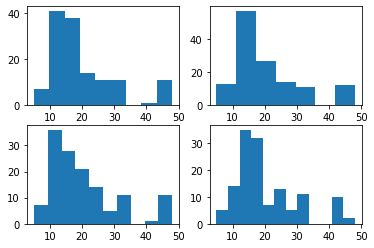

In [21]:
plt.subplot(2,2,1)
plt.hist(dfn["Breadth"], bins="sturges")

plt.subplot(2,2,2)
plt.hist(dfn["Breadth"], bins="scott")

plt.subplot(2,2,3)
plt.hist(dfn["Breadth"], bins="fd")

plt.subplot(2,2,4)
plt.hist(dfn["Breadth"], bins="sqrt")

plt.show()

How are bins calculated? 

Sturges':
k = 1 + 3.322 log n

Scott's:
h = 3.49 * std.dev / cuberoot(n)

Square root:
k = sqrt(n)

Freedman-Diaconis': 

h = 2 * IQR(x) / cuberoot(n)

Where:
k = number of bins
n = number of items in the data set.
h = bin width
IQR = interquartile range

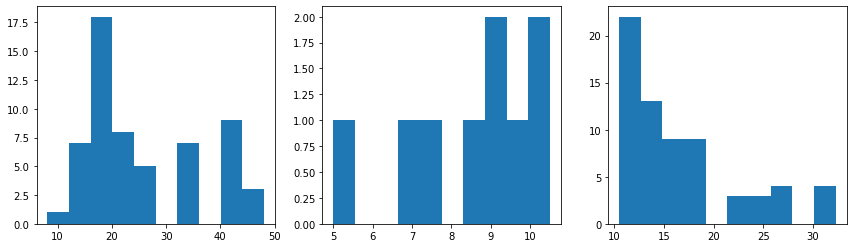

In [22]:
plt.subplot(1,3,1)
plt.hist(dfn[dfn["Ship_type"] == "Tanker"]["Breadth"])

plt.subplot(1,3,2)
plt.hist(dfn[dfn["Ship_type"] == "Tug"]["Breadth"])

plt.subplot(1,3,3)
plt.hist(dfn[dfn["Ship_type"] == "Cargo"]["Breadth"])

plt.subplots_adjust(right=2)
plt.show()

Tugs are pretty different from the others-> they could be distinguished by their breadth. Maybe also cargos and tankers; Cargos are more prominently on the narrower side

#### b)	Explain what a boxplot is. Plot them for the numeric attributes (excluding 'Origin') grouped by the ship type. Any outliers that require some action with the data?

A plot where you can easily see min, max, quartiles and median 


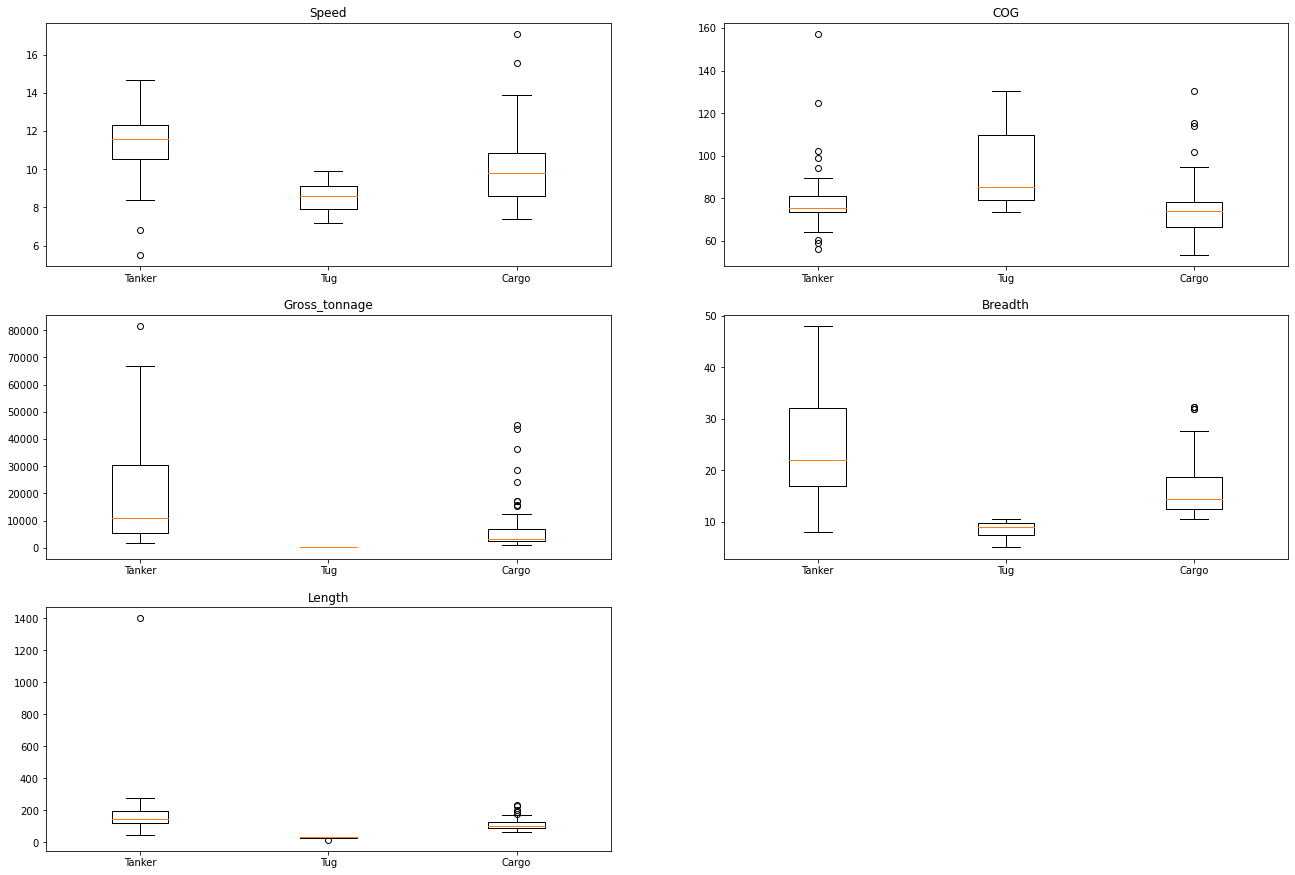

In [23]:
plt.subplot(3,2,1)
plt.boxplot([dfn[dfn["Ship_type"] == "Tanker"]["Speed"],
             dfn[dfn["Ship_type"] == "Tug"]["Speed"],
             dfn[dfn["Ship_type"] == "Cargo"]["Speed"]])
plt.xticks([1, 2, 3], ['Tanker', 'Tug', 'Cargo'])
plt.title("Speed")

plt.subplot(3,2,2)
plt.boxplot([dfn[dfn["Ship_type"] == "Tanker"]["COG"],
             dfn[dfn["Ship_type"] == "Tug"]["COG"],
             dfn[dfn["Ship_type"] == "Cargo"]["COG"]])
plt.xticks([1, 2, 3], ['Tanker', 'Tug', 'Cargo'])
plt.title("COG")

plt.subplot(3,2,3)
plt.boxplot([dfn[dfn["Ship_type"] == "Tanker"]["Gross_tonnage"],
             dfn[dfn["Ship_type"] == "Tug"]["Gross_tonnage"],
             dfn[dfn["Ship_type"] == "Cargo"]["Gross_tonnage"]])
plt.xticks([1, 2, 3], ['Tanker', 'Tug', 'Cargo'])
plt.title("Gross_tonnage")

plt.subplot(3,2,4)
plt.boxplot([dfn[dfn["Ship_type"] == "Tanker"]["Breadth"],
             dfn[dfn["Ship_type"] == "Tug"]["Breadth"],
             dfn[dfn["Ship_type"] == "Cargo"]["Breadth"]])
plt.xticks([1, 2, 3], ['Tanker', 'Tug', 'Cargo'])
plt.title("Breadth")

plt.subplot(3,2,5)
plt.boxplot([dfn[dfn["Ship_type"] == "Tanker"]["Length"],
             dfn[dfn["Ship_type"] == "Tug"]["Length"],
             dfn[dfn["Ship_type"] == "Cargo"]["Length"]])
plt.xticks([1, 2, 3], ['Tanker', 'Tug', 'Cargo'])
plt.title("Length")


plt.subplots_adjust(right=3, top=3)
plt.show()

There are outliers. BIG tanker could be decimal error

##  8. Relationships between attributes

### Pairplots

#### a) Plot pairwise scatter plots of the numerical attributes. What kind of relationships can you see? Can you see any outliers? 

In [24]:
import seaborn as sns

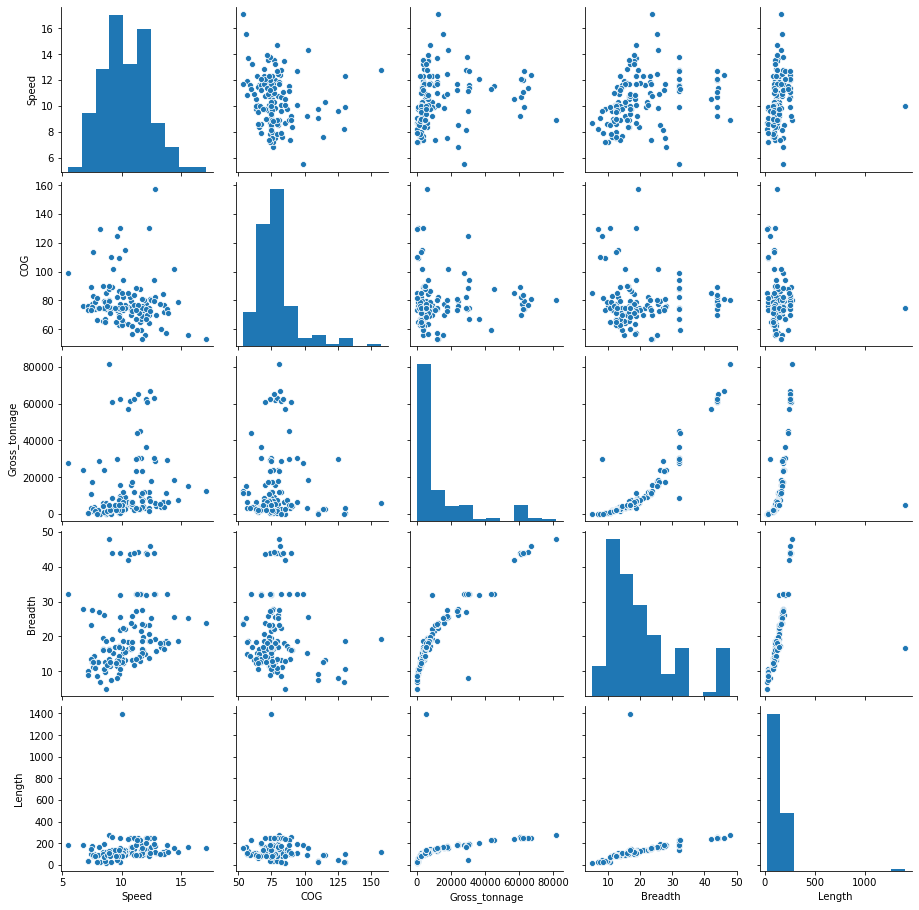

In [25]:
pairdf = dfn[["Speed", "COG", "Gross_tonnage", "Breadth", "Length"]].copy()
x = sns.pairplot(pairdf, diag_kws={'bins': 10})
x

Speed and COG dont seem to correlate. Tonnage, breadth and length are all related. 
There is still THE BIG SHIP

#### b) Make a new clean dataframe without outlier(s) (and include the most relevant attributes only, or limit to those in next tasks) 

In [26]:
from scipy import stats

In [27]:
newdf = dfn[["Gross_tonnage", "Breadth", "Length"]].copy()


newdf = newdf[(np.abs(stats.zscore(newdf)) < 3).all(axis=1)]

NameError: name 'np' is not defined

In [ ]:
x = sns.pairplot(newdf, diag_kws={'bins': 10})
x

### Correlation and heatmap

#### c) What are Pearson's correlation, Spearman's rho and Kendall's tau? Calculate the correlation coefficient matrices. What kind of relationships there are between the attributes? Does the detected outlier affect the correlation? You can use heatmap to visualize the matrices and more easily see the strength of the relationship.

Pearson r correlation measures the degree of the relationship between linearly related variables.

Spearman rank correlation is a non-parametric test that is used to measure the degree of association between two variables. 

Kendall rank correlation is a non-parametric test that measures the strength of dependence between two variables

In [ ]:
newdf.corr()

Length doesnt correlate linearly with the others

In [ ]:

newdf.corr(method="spearman")

Describe your findings here...

In [ ]:
newdf.corr(method="kendall")

Explain your fidings here...

## BONUS: Dimensionality reduction

#### Explain what principal component analysis is. Do that with and without z-score standardization. Visualize the results with a scatter plot by projecting the data to the first two principal components. How much of the variation is explained with the two principal components?

Explanation of the PCA here...

In [ ]:
# Script here


Findings here...